## HELLO EVERYONE:)

# PART-2 DATA VISUALIZATION ON TELECOM CHURN DATASET:

FIRSTLY,LET'S IMPORT SPECIFIC PACKAGES: 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config inlineBackend.figure_format = 'retina'#retina format gives more sharp graphics.

In [20]:
telecom_data=pd.read_csv("BigML_Dataset_5f4ba58995a9302e500019e2.csv")
telecom_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Start with countplot:

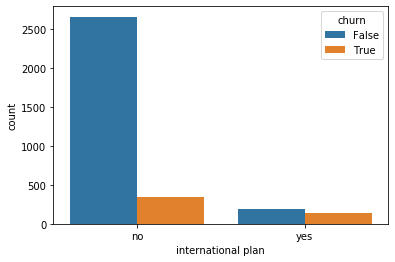

In [23]:
sns.countplot(x='international plan',hue='churn',data=telecom_data)

Let's look on some other important feature i.e customer service calls.

In [25]:
pd.crosstab(telecom_data['churn'],telecom_data['customer service calls'],margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


CHURN:It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period

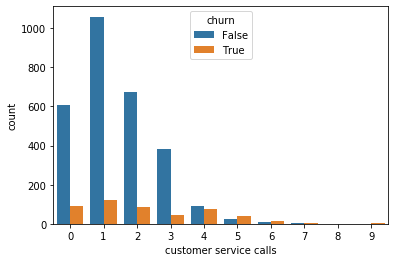

In [26]:
sns.countplot(x='customer service calls',hue='churn',data=telecom_data)

# HISTOGRAM:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10E04D90>,
      dtype=object)

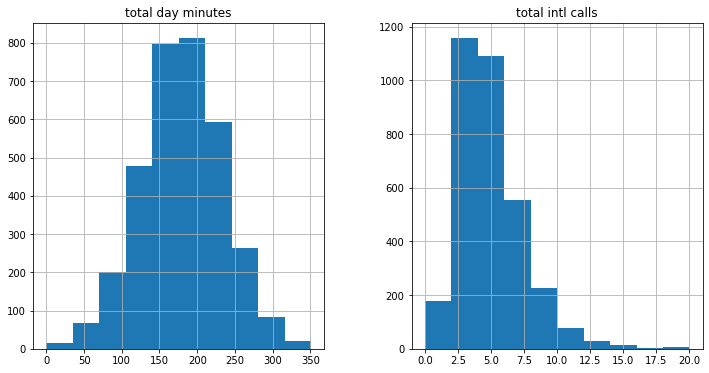

In [39]:
features=['total day minutes','total intl calls']
telecom_data[features].hist(figsize=(12,6))

# DENSITY PLOT:

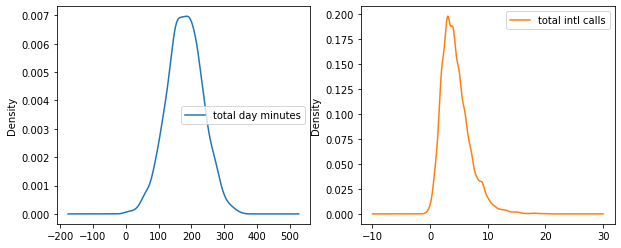

In [40]:
telecom_data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

Same thing we can do with seaborn library:


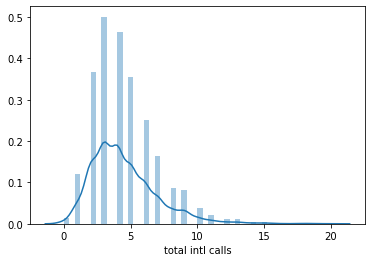

In [44]:
sns.distplot(telecom_data['total intl calls'])

# BOX PLOTS:

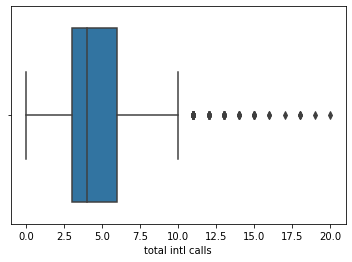

In [48]:
sns.boxplot(x='total intl calls',data=telecom_data)


# VIOLIN PLOT:

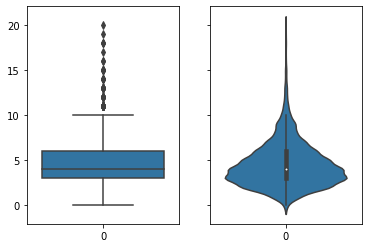

In [50]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=telecom_data['total intl calls'], ax=axes[0]);
sns.violinplot(data=telecom_data['total intl calls'], ax=axes[1]);

Let's plot the distributions for two categorical variables:

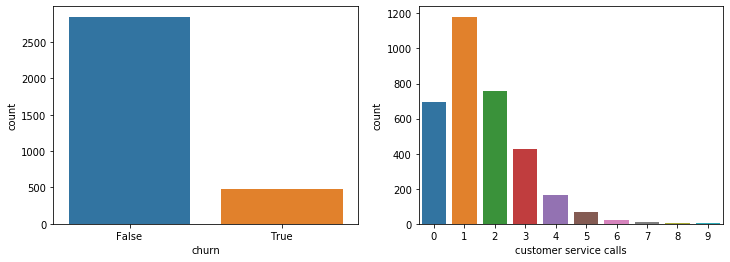

In [52]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=telecom_data, ax=axes[0]);
sns.countplot(x='customer service calls', data=telecom_data, ax=axes[1]);

# HEATMAP:

We will find correlation of every numerical column.


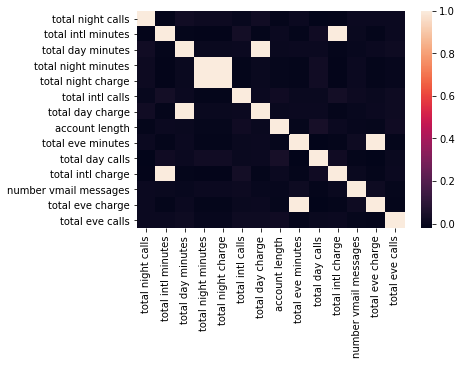

In [54]:
numerical = list(set(telecom_data.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = telecom_data[numerical].corr()
sns.heatmap(corr_matrix);

# SCATTER PLOT:

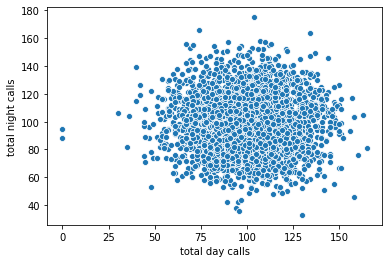

In [56]:
sns.scatterplot(x='total day calls',y='total night calls',data=telecom_data)

# JOINT PLOT:

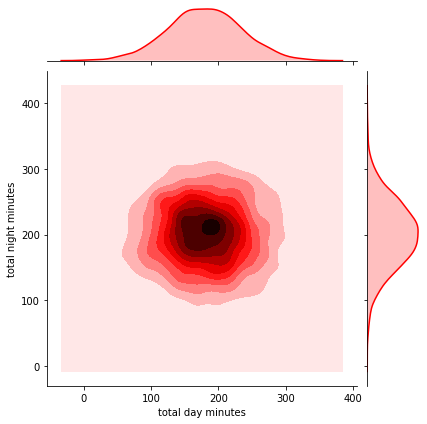

In [62]:
sns.jointplot('total day minutes', 'total night minutes', data=telecom_data,
              kind="kde", color="r");

The above graph is bivariate graph and KDE='kernal density plot'

# PAIR PLOT:

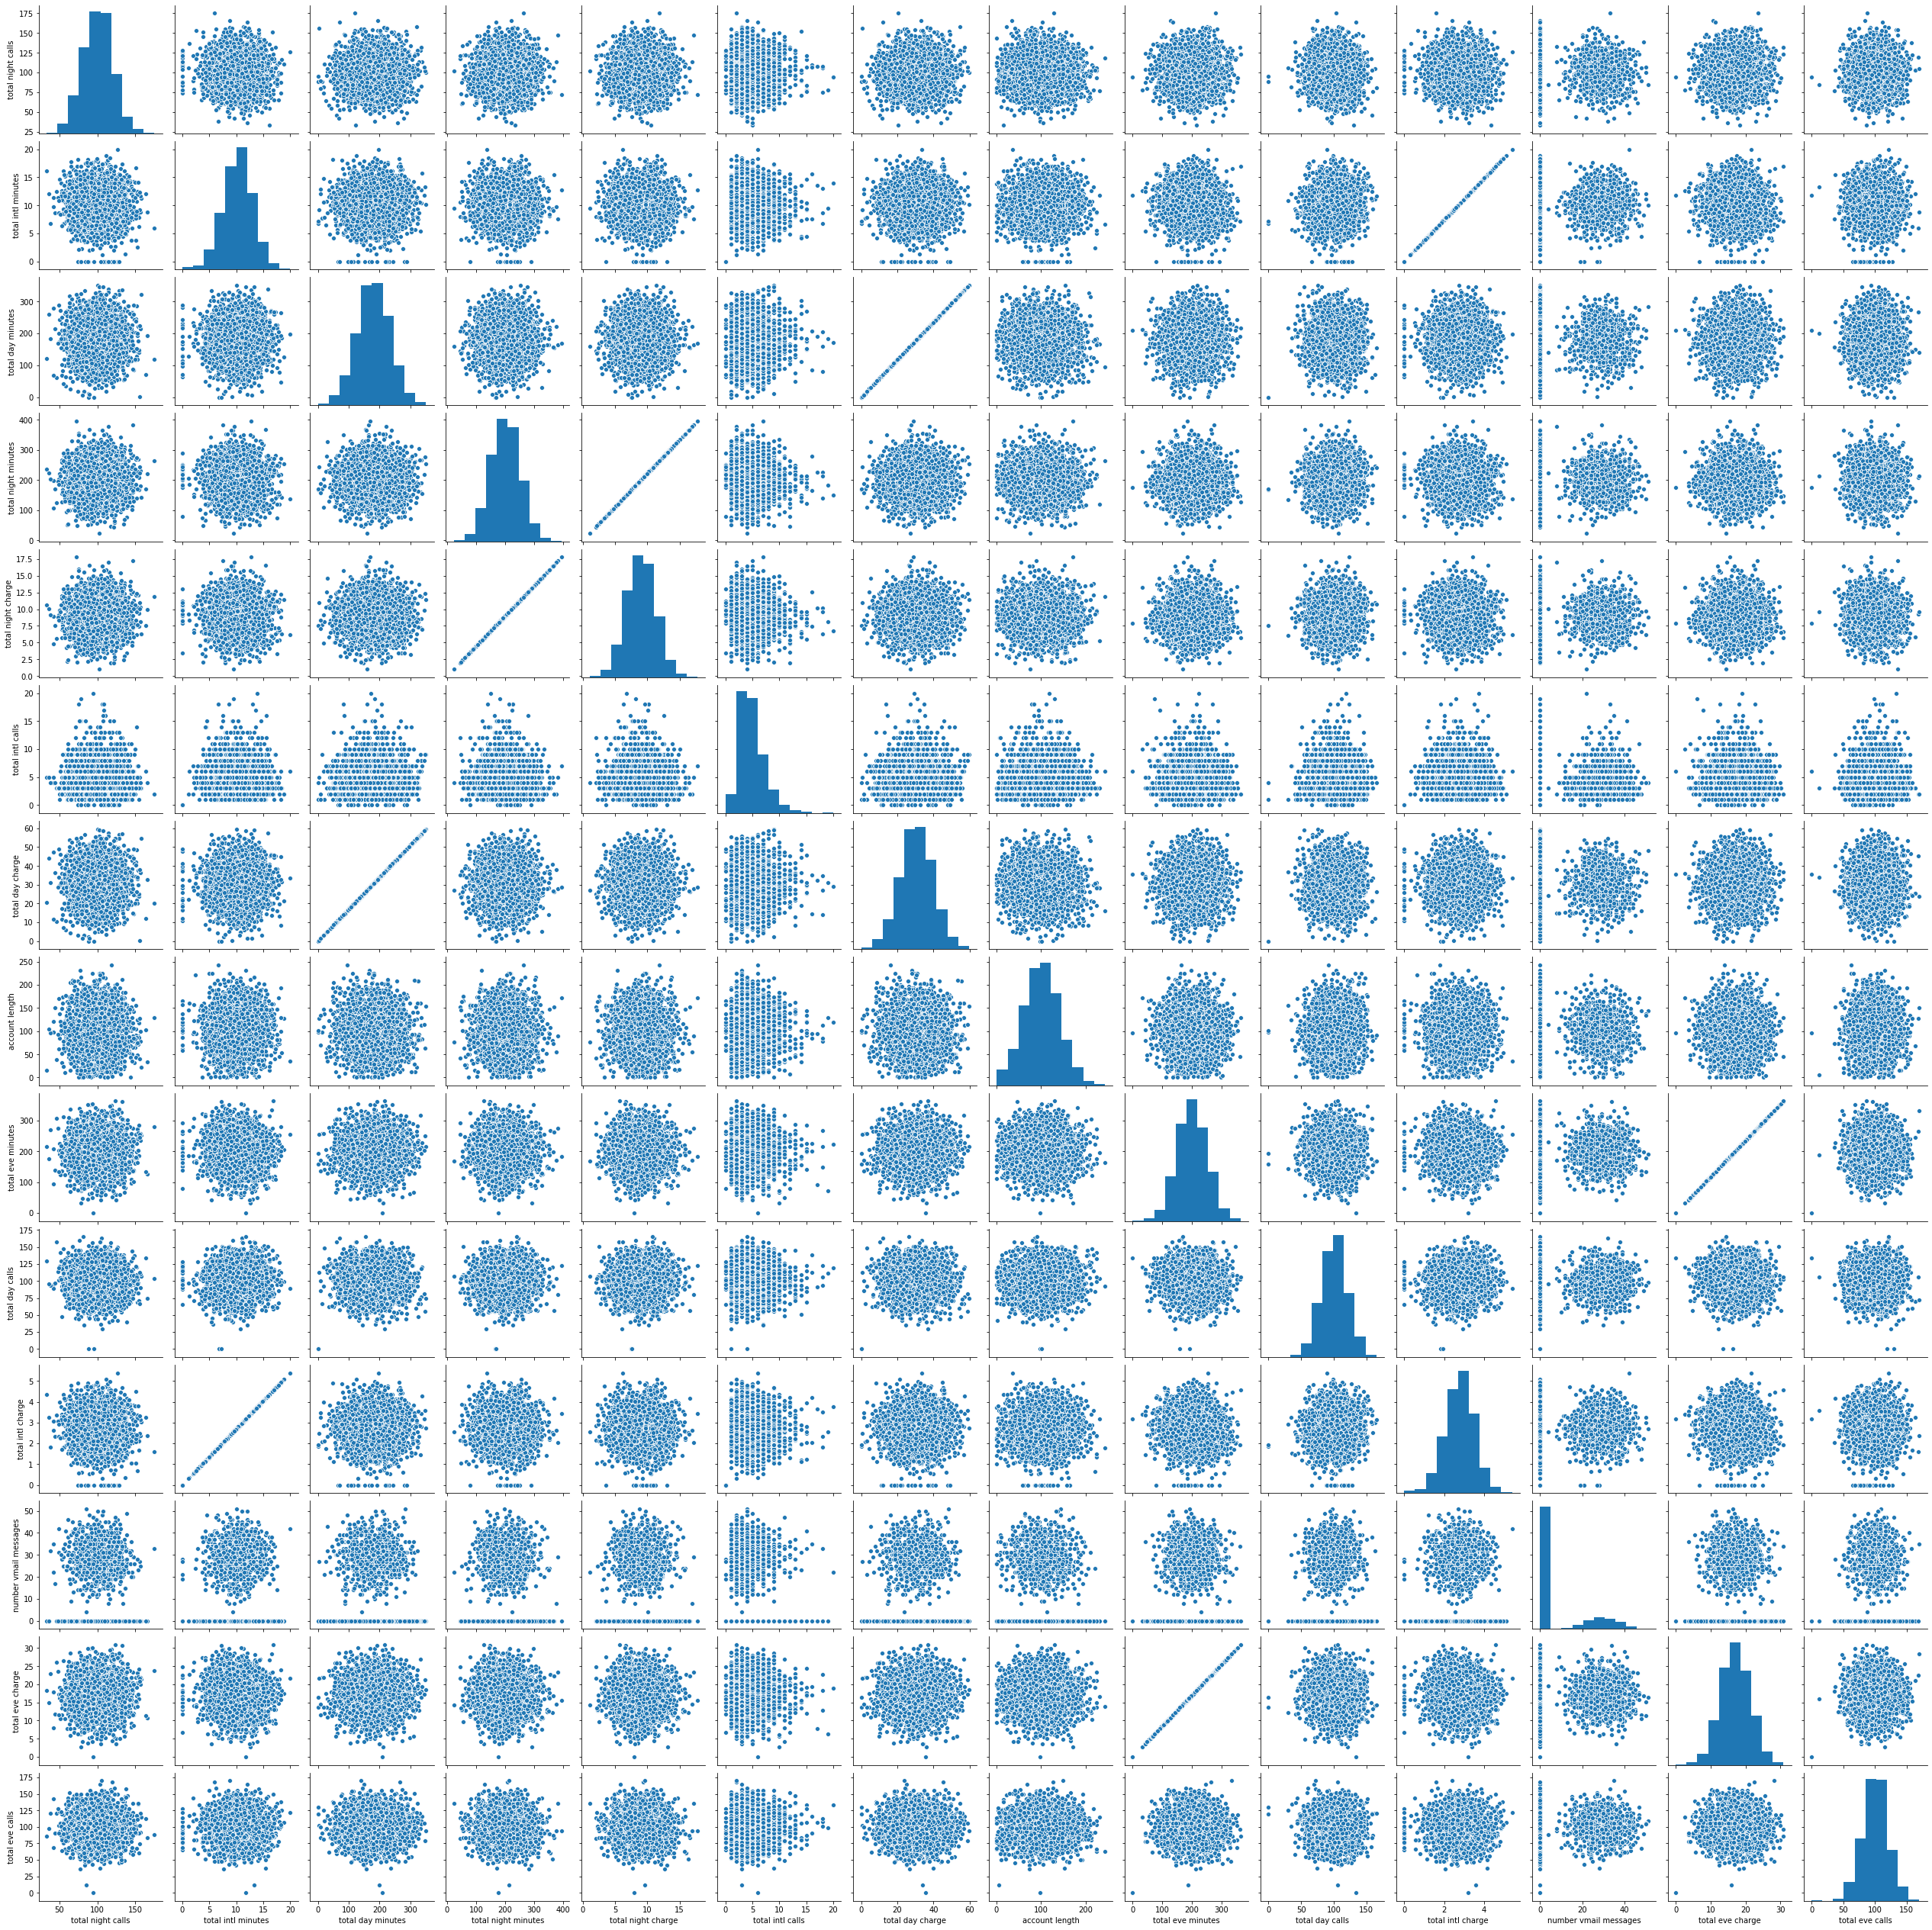

In [67]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(telecom_data[numerical])

In [73]:
%config InlineBackend.figure_format = 'retina'

IndexError: index 3 is out of bounds for axis 0 with size 3

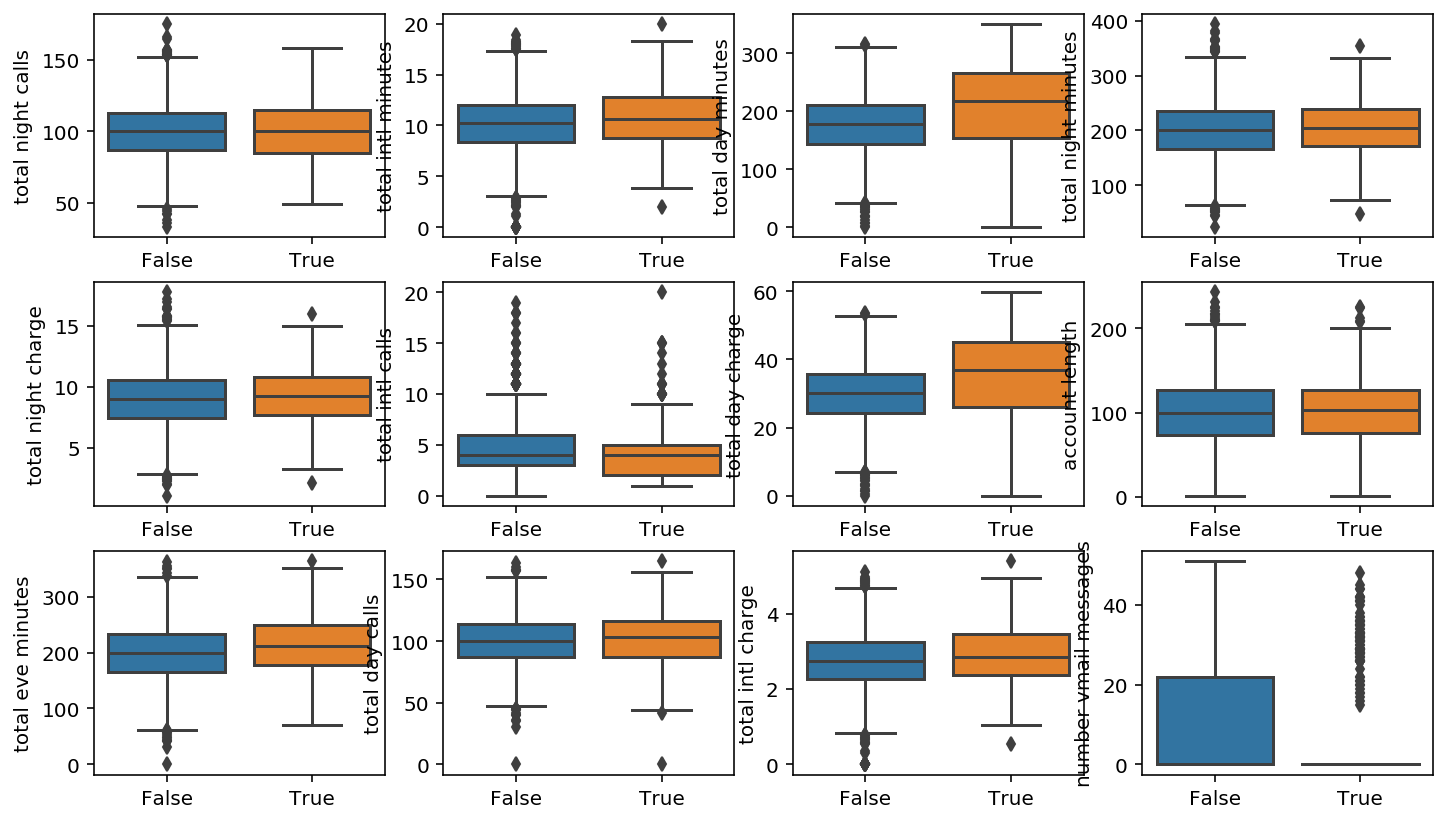

In [75]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=telecom_data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

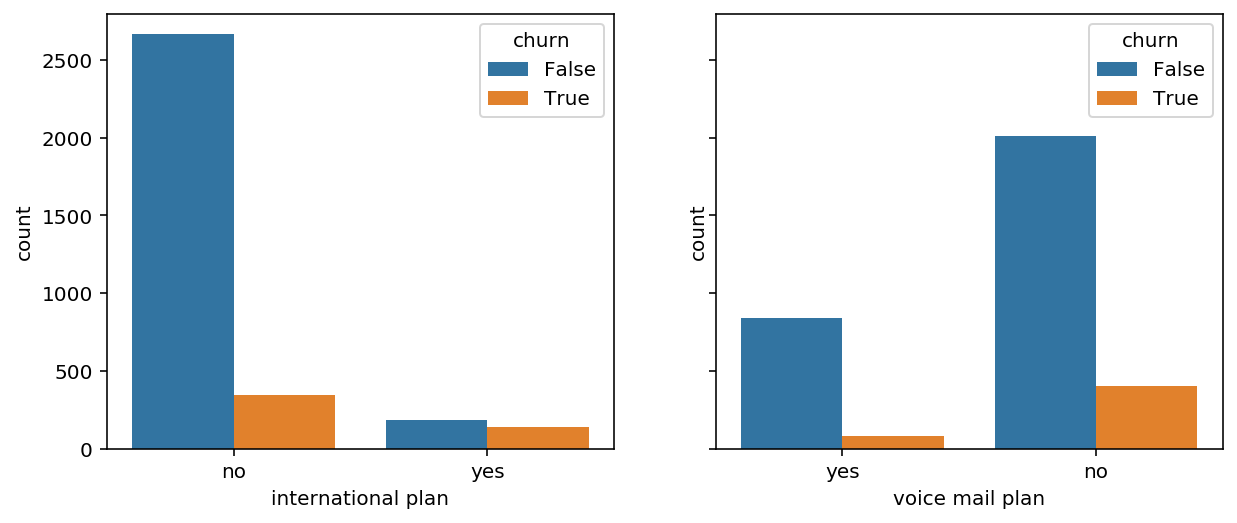

In [76]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=telecom_data, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=telecom_data, ax=axes[1]);